# Úvod
Ve svojí implementaci řešení projektu jsem se velice inspiroval u materiálů k přednáškám. Jako kód pro načtení všech signálů jsem použil, s mírnými úpravami, ten, co nám byl předložen v zadání.



In [104]:
import numpy as np
import pylab as pl
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read("../audio/klavir.wav")

N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
TIME = np.linspace(0,1/Fs,num=Fs)

xall = np.zeros((MIDITO+1, N))
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x)
    xall[tone,:] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone

#### Zobrazení celého signálu pro ověření funkčnosti



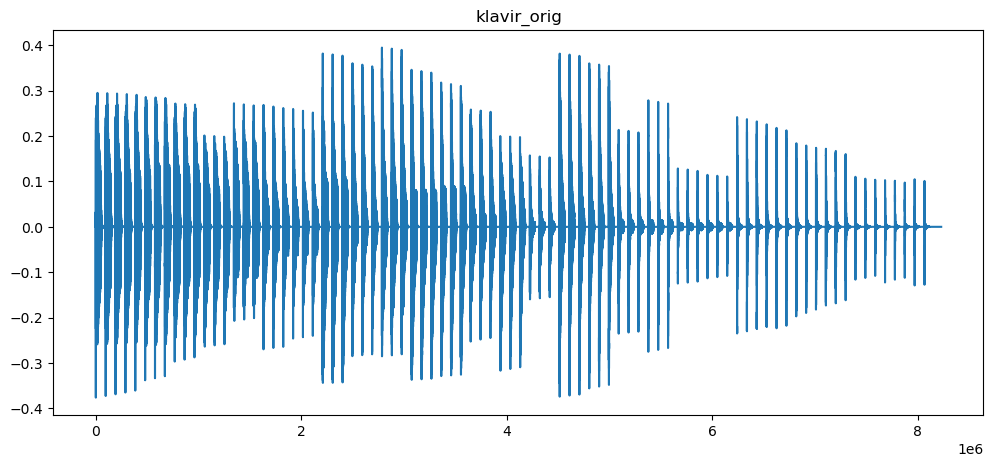

In [105]:
plt.figure(figsize=(12,5))
plt.title('klavir_orig')
plt.plot(s)
plt.show()

# ÚKOL 4.1
Zde jsou postupně zpracovány všechny tóny 40, 78, 80. U každého tónu jsou:
- vykresleny 3 periody
- vypočítáno a zobrazeno spektrum



#### Tón 40 ve 3 periodách



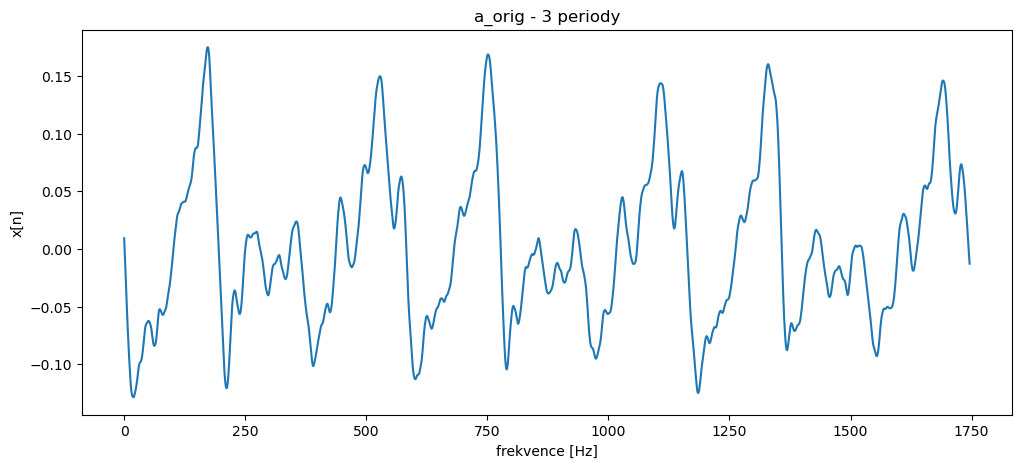

In [106]:
MIDI_A = 40 # ton a
MIDI_A_F = 82.41 # zakladni frekvence
#MIDI A
plt.figure(figsize=(12,5))
plt.title('a_orig - 3 periody')
TONE_A = xall[MIDI_A] # ziskani tonu
sf.write('../audio/a_orig.wav', TONE_A, Fs) # vytvareni zvukoveho souboru
plt.plot(TONE_A[0:int(3*Fs/MIDI_A_F)]) # ton ve 3 periodach
plt.xlabel('frekvence [Hz]')
plt.ylabel('x[n]')
plt.show()
display(Audio(TONE_A, rate=Fs))

#### Spektrum tónu 40



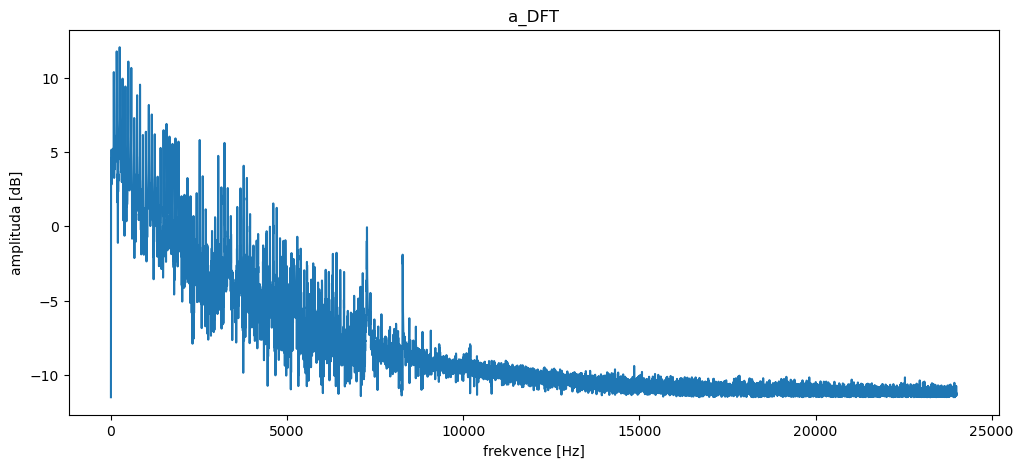

In [107]:
#MIDI A DFT
TONE_A_DFT = np.fft.fft(TONE_A) # dft
TONE_A_DFT = np.abs(TONE_A_DFT)
TONE_A_DFT = TONE_A_DFT[:TONE_A_DFT.size//2] # zkraceni na polovinu
F = np.arange(TONE_A_DFT.size) * Fs / TONE_A.size # prepocet frekvence
plt.figure(figsize=(12,5))
plt.title('a_DFT')
plt.xlabel('frekvence [Hz]')
plt.ylabel('amplituda [dB]')
logDFT = np.log(TONE_A_DFT**2 + 10**(-5))
plt.plot(F, logDFT)
plt.show()

#### Tón 78 ve 3 periodách



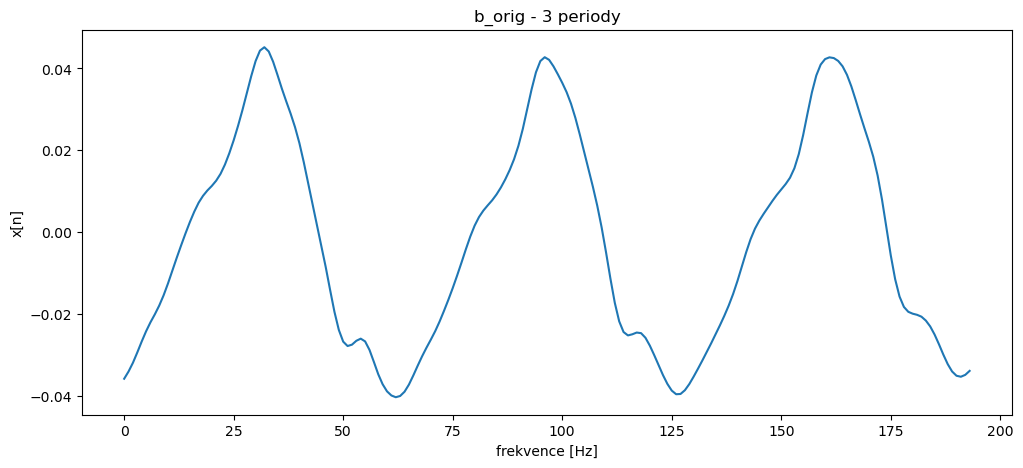

In [108]:
MIDI_B = 78 # ton b
MIDI_B_F = 739.99 # zakladni frekvence
#MIDI B
plt.figure(figsize=(12,5))
plt.title('b_orig - 3 periody')
TONE_B = xall[MIDI_B] # ziskani tonu
sf.write('../audio/b_orig.wav', TONE_B, Fs) # vytvareni zvukoveho souboru
plt.plot(TONE_B[0:int(3*Fs/MIDI_B_F)]) # ton ve 3 periodach
plt.xlabel('frekvence [Hz]')
plt.ylabel('x[n]')
plt.show()
display(Audio(TONE_B, rate=Fs))

#### Spektrum tónu 78



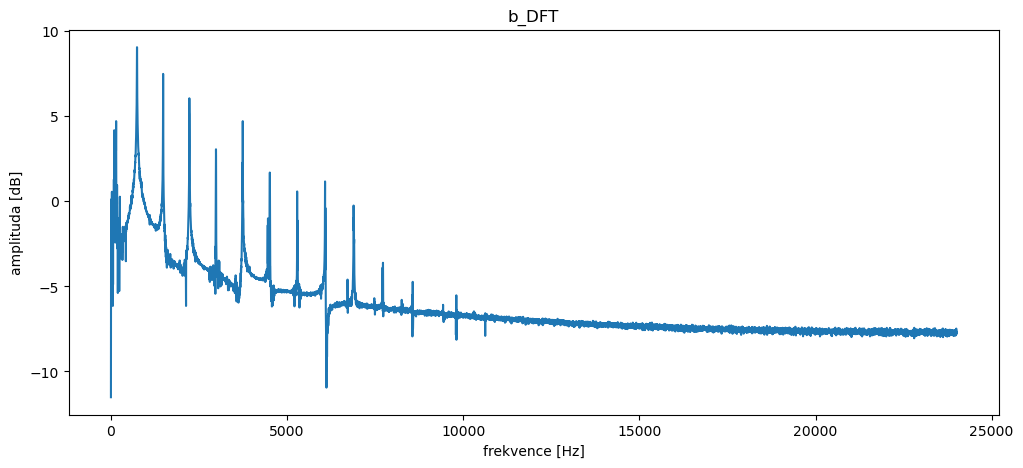

In [109]:
#MIDI B DFT
TONE_B_DFT = np.fft.fft(TONE_B)
TONE_B_DFT = np.abs(TONE_B_DFT)
TONE_B_DFT = TONE_B_DFT[:TONE_B_DFT.size//2] # zkraceni na polovinu
F = np.arange(TONE_B_DFT.size) * Fs / TONE_B.size # prepocet frekvence
plt.figure(figsize=(12,5))
plt.title('b_DFT')
plt.xlabel('frekvence [Hz]')
plt.ylabel('amplituda [dB]')
logDFT = np.log(TONE_B_DFT**2 + 10**(-5))
plt.plot(F, logDFT)
plt.show()

#### Tón 80 ve 3 periodách



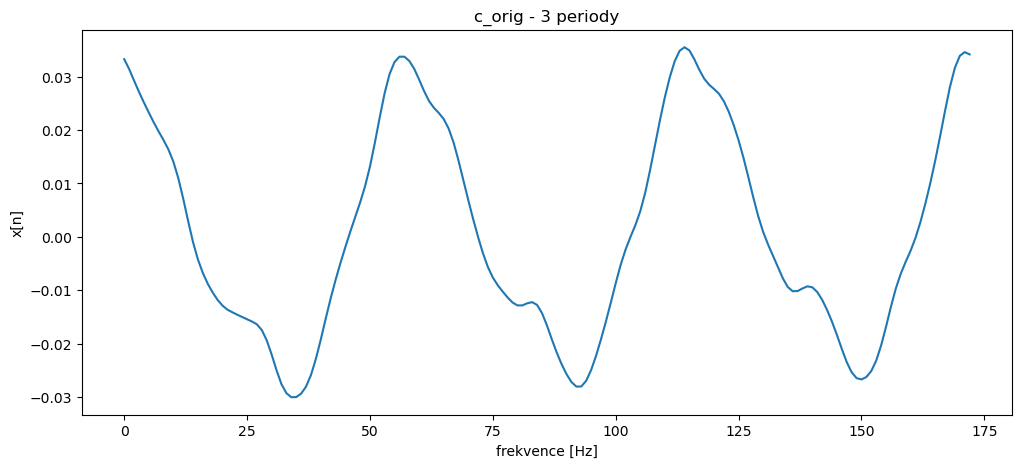

In [110]:
MIDI_C = 80 # ton c
MIDI_C_F = 830.61 # zakladni frekvence
#MIDI C
plt.figure(figsize=(12,5))
plt.title('c_orig - 3 periody')
TONE_C = xall[MIDI_C] # ziskani tonu
sf.write('../audio/c_orig.wav', TONE_C, Fs) # vytvareni zvukoveho souboru
plt.plot(TONE_C[0:int(3*Fs/MIDI_C_F)]) # ton ve 3 periodach
plt.xlabel('frekvence [Hz]')
plt.ylabel('x[n]')
plt.show()
display(Audio(TONE_C, rate=Fs))

#### Spektrum tónu 80



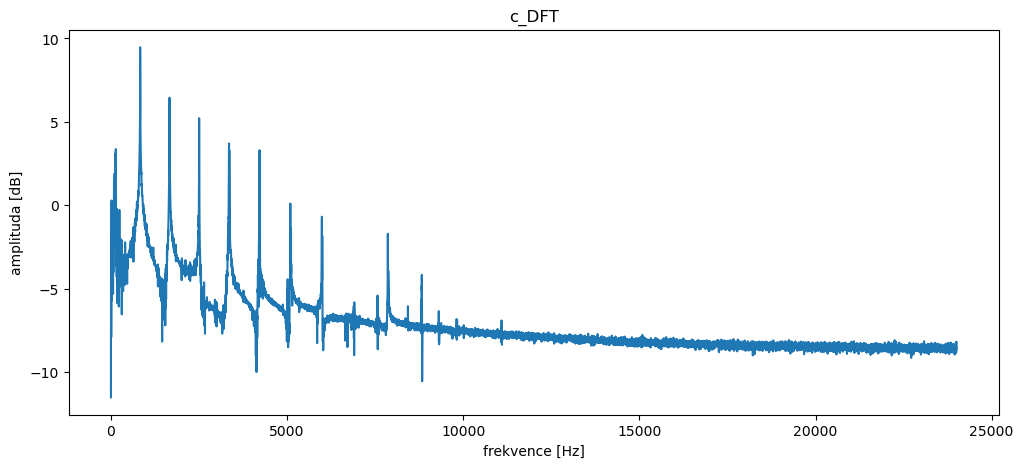

In [111]:
#MIDI C DFT
TONE_C_DFT = np.fft.fft(TONE_C)
TONE_C_DFT = np.abs(TONE_C_DFT)
TONE_C_DFT = TONE_C_DFT[:TONE_C_DFT.size//2] # zkraceni na polovinu
F = np.arange(TONE_C_DFT.size) * Fs / TONE_C.size # prepocet frekvence
plt.figure(figsize=(12,5))
plt.title('c_DFT')
plt.xlabel('frekvence [Hz]')
plt.ylabel('amplituda [dB]')
logDFT = np.log(TONE_C_DFT**2 + 10**(-5))
plt.plot(F, logDFT)
plt.show()

# ÚKOL 4.2

### AUTOKORELACE
Pro odhad základní frekvence nižších tónů (od 24 až do 41 včetně) jsem použil výpočet pomocí autokorelace.

Výpočet jsem provedl následovně:
$$ f_0 = \frac{vzorkovací\;frekvence}{rozdíl\;frekvencí\;první\;a\;druhé\;nejvyšší\;hodnoty\;autokorelace} $$

- výstup v souboru **inacurrate_f0.txt**



In [112]:
output = open('inacurrate_f0.txt', 'w')
i = 24
f0_inacurrate = np.zeros(MIDITO+1)
for TONE in xall[i:42]:
    corr = np.correlate(TONE, TONE,"full")
    peak1 = scipy.signal.find_peaks(corr[corr.size//2-1:], max(corr[corr.size//2:])/1.4)[0][0] # první nejvyšší hodnota autokorelace
    peak2 = scipy.signal.find_peaks(corr[corr.size//2-1:], max(corr[corr.size//2:])/1.4)[0][1] # druhá nejvyšší hodnota autokorelace
    f0_inacurrate[i] = Fs/(peak2-peak1);
    print('MIDI',i,"f0", (Fs/(peak2-peak1)).round(3), "\t[autokorelace]", file=output) # vypis

    i = i+1

output.close()

#### Tón 40
Zde je na tónu 40 názorně zobrazen výpočet základní frekvence.



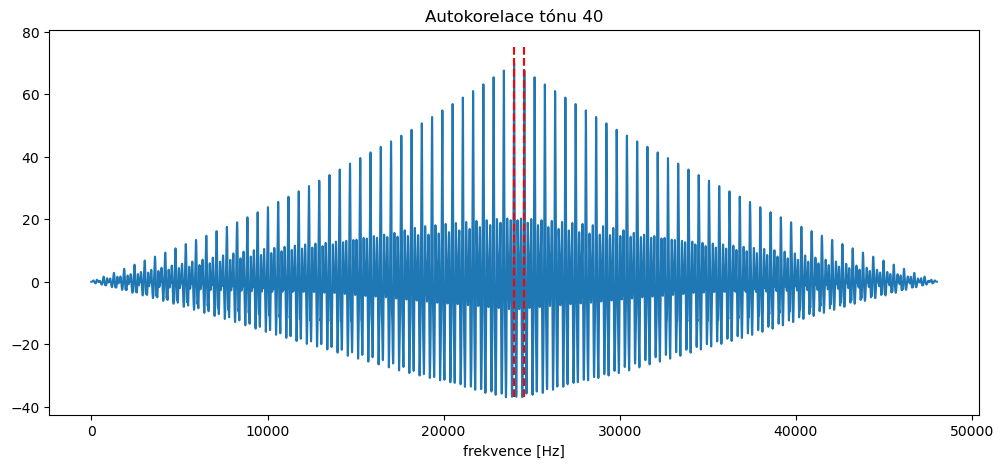

In [113]:
TONE_A_autocorr = np.correlate(TONE_A, TONE_A,"full")
peak1 = scipy.signal.find_peaks(TONE_A_autocorr[TONE_A_autocorr.size//2-1:], max(TONE_A_autocorr[TONE_A_autocorr.size//2:])/1.4)[0][0] # první nejvyšší hodnota autokorelace
peak2 = scipy.signal.find_peaks(TONE_A_autocorr[TONE_A_autocorr.size//2-1:], max(TONE_A_autocorr[TONE_A_autocorr.size//2:])/1.4)[0][1] # druhá nejvyšší hodnota autokorelace
plt.figure(figsize=(12,5))
plt.title('Autokorelace tónu 40')
plt.xlabel('frekvence [Hz]')
plt.plot(TONE_A_autocorr)
plt.vlines(TONE_A_autocorr.size//2 - 1 + peak1, min(TONE_A_autocorr),max(TONE_A_autocorr)+5, colors='red', linestyles='dashed')
plt.vlines(TONE_A_autocorr.size//2 - 1 + peak2, min(TONE_A_autocorr),max(TONE_A_autocorr)+5, colors='red', linestyles='dashed')
plt.show()

### DFT
Odhad tónů 41 až 108 jsem počítal přes DFT.
S výpočtem jsem se inspiroval v materiálech k přednáškám.
- výstup v souboru **inacurrate_f0.txt**



In [114]:
output = open('inacurrate_f0.txt', 'a') #
i = 42
for TONE in xall[42:]:
    DFT = np.fft.fft(TONE)
    f0 = (np.arange(DFT.size) * Fs / TONE.size)[np.argmax(np.abs(DFT[:DFT.size//2]))]
    print('MIDI',i,"f0", f0, "\t[DFT]", file=output)
    f0_inacurrate[i] = f0
    i+=1

output.close()

### Tón 78
- na grafu je vyznačena frekvence $f_0$



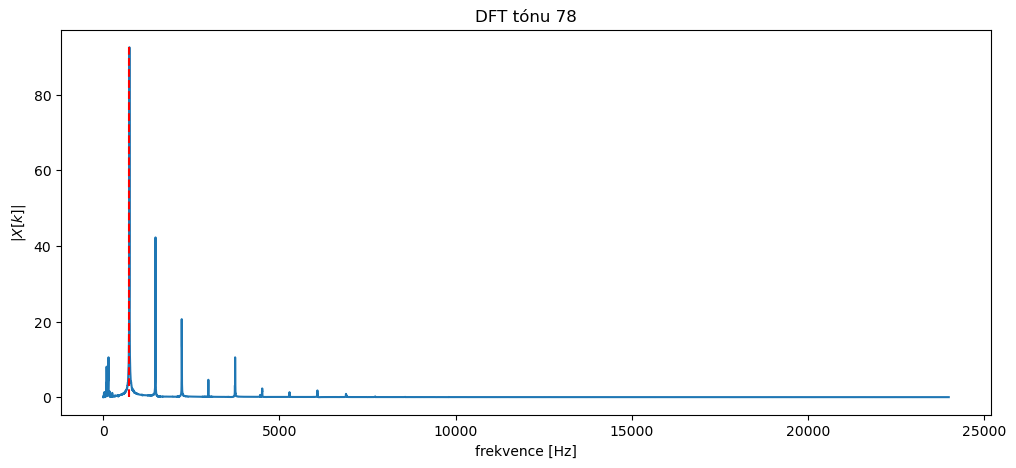

In [115]:
f0 = (np.arange(TONE_B_DFT.size) * Fs / TONE_B.size)[np.argmax(np.abs(TONE_B_DFT[:TONE_B_DFT.size//2]))]
plt.figure(figsize=(12,5))
plt.title('DFT tónu 78')
plt.xlabel('frekvence [Hz]')
plt.ylabel('$|X[k]|$')
plt.plot(np.arange(TONE_B_DFT.size) * Fs / TONE_B.size, TONE_B_DFT)
plt.vlines(f0, 0, max(TONE_B_DFT), colors='red', linestyles='dashed')
plt.show()

### Tón 80
- na grafu je vyznačena frekvence $f_0$



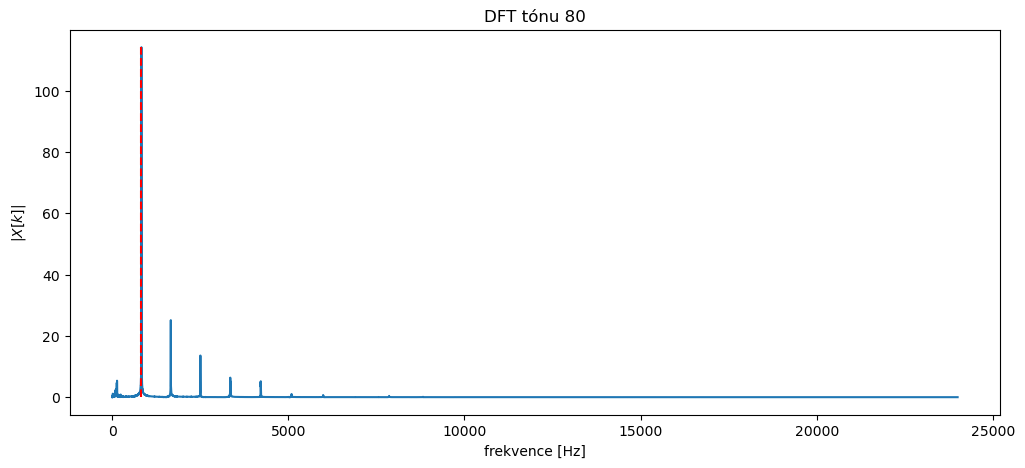

In [116]:
f0 = (np.arange(TONE_C_DFT.size) * Fs / TONE_C.size)[np.argmax(np.abs(TONE_C_DFT[:TONE_C_DFT.size//2]))]
plt.figure(figsize=(12,5))
plt.title('DFT tónu 80')
plt.xlabel('frekvence [Hz]')
plt.ylabel('$|X[k]|$')
plt.plot(np.arange(TONE_C_DFT.size) * Fs / TONE_C.size, TONE_C_DFT)
plt.vlines(f0, 0, max(TONE_C_DFT), colors='red', linestyles='dashed')
plt.show()

# ÚKOL 4.3

### DTFT
Výpočet DTFT jsem převzal z materiálu **o2_spectral.ipynb** a lehce upravil, abych jej lépe pochopil. Výpočet upřesnění $f_0$ provádím v rozsahu $\pm$6 frekvencí v okolí odhadnuté $f_0$.
Odhad $f_0$ je kombinací autokorelace a DFT (vizte bod 4.2).
- výstup v souboru **precise_f0.txt**



In [117]:
output = open('precise_f0.txt', 'w')
precise_f0 = np.zeros(MIDITO+1) # pole pro zapis ziskanych hodnot
for i in range(MIDIFROM, MIDITO + 1, 1):
    TONE = xall[i]
    FREQRANGE = 6 # rozsah
    f0_basic = f0_inacurrate[i] #odhadnuta frekvence f0

    step = 0.01 # krok pro vypocet

    n = np.arange(0, TONE.size)
    A = np.zeros([int(FREQRANGE*2/step)+1, TONE.size],dtype=complex)
    j = 0
    for k in np.arange(f0_basic-FREQRANGE, f0_basic+FREQRANGE, step):
        A[j,:] = np.exp(-1j * 2 * np.pi * k * (n/TONE.size))
        j+=1
    Xdtft = np.matmul(A,TONE.T)
    precise_f0[i] = np.arange(f0_basic-FREQRANGE, f0_basic+FREQRANGE, step)[np.argmax(np.abs(Xdtft))]
    print("MIDI", i, "\tf0", precise_f0[i].round(4), "\t\t[DTFT]", file=output)

output.close()

#### Porovnání odhadu a zpřesnění (zpřesnění-odhad)

- výstup v souboru **comparison.txt**



In [118]:
output = open('comparison.txt', 'w')
for i in range(MIDIFROM, MIDITO+1):
    print("MIDI", i, "\t=> odhad:", f0_inacurrate[i].round(3), " \tvs\tzpresneni:", precise_f0[i].round(3), "\t| ROZDIL: ", (precise_f0[i]-f0_inacurrate[i]).round(3),end='  ', file=output)
    if i<42:
        print("\t[AUTOKORELACE vs DTFT]", file=output)
    else:
        print("\t[DFT vs DTFT]", file=output)

output.close()